# Handling missing data

### 1.Why are there missing values in the datasets?

- Data entry errors:- Sometimes, data may not be entered correctly, leading to missing values.
- Non-response or non-participation:- Participants may not respond to certain questions, resulting in missing data.
- Data not collected:- In some cases, certain data points may not have been collected due to technical or logistical         reasons.
- Data cleaning or preprocessing:- Missing data may be intentionally introduced during data cleaning or preprocessing,
  such as when outliers or invalid values are removed.
- Confidentiality or privacy concerns: - In some cases, certain data points may be withheld to protect the confidentiality   or privacy of individuals or organizations

## 2.What are the different types of Missing Data?

- **Missing Completely at Random (MCAR):** MCAR occurs when the missingness of data is completely unrelated to any other     variable in the dataset,including the variable being measured. In other words, the missingness occurs randomly and there   is no systematic reason why certain values are missing.This type of missing data is considered to be the least             problematic because it does not introduce bias into the analysis.
- **Missing at Random (MAR):** MAR occurs when the missingness of data is related to other variables in the dataset, but       not to the variable being measured. In other words, the missingness is related to other measured variables in the           dataset, but not to the variable that is missing. This type of missing data can introduce bias into the analysis if the     relationship between the missing data and the other variables in the dataset is not properly accounted for.
- **Missing Not at Random (MNAR):** MNAR occurs when the missingness of data is related to the value of the variable that      is missing. In other words, the missingness is related to the unmeasured value of the variable that is missing. This        type of missing data can introduce significant bias into the analysis because the missing values may be systematically      different from the non-missing values and simply ignoring the missing data can lead to incorrect conclusions.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("titanic1.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

# mean / median / mode imputation

- Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 
- We solve this by replacing the NAN with the most frequent occurance of the variables.

## To reduce impact of outliers, we use median.

In [17]:
def impute_median(df,variable,median):
    df[variable + "_median"] = df[variable].fillna(median)

In [18]:
 median = df["Age"].median()
impute_median(df,"Age",median)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [20]:
df["Age"].std()

14.18120923562442

In [21]:
df["Age_median"].std()

12.703769846333287

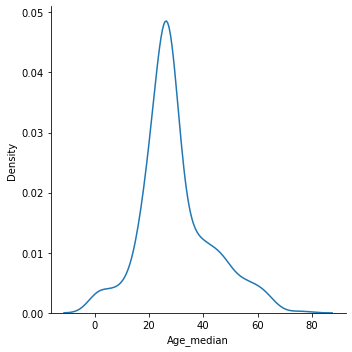

In [22]:
sns.displot(df["Age_median"],kind="kde")

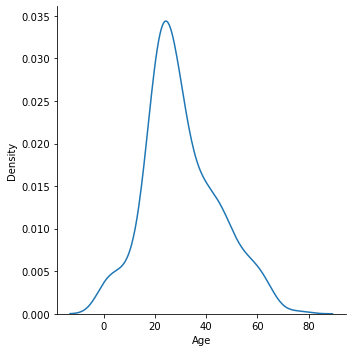

In [23]:
sns.displot(df["Age"],kind="kde")

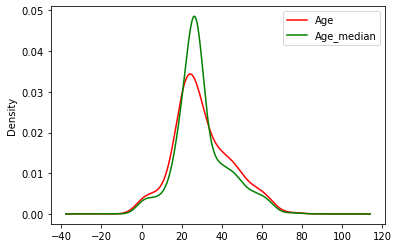

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="red")
df["Age_median"].plot(kind="kde",ax=ax,color="green")
lines, lables=ax.get_legend_handles_labels()
ax.legend(lines, lables,loc="best")
plt.show() # kde = kernel density estimation

**Advantages**
- Easy to implement
- Preserves sample size
- Works well for variables with a normal distribution

**Disadvantages**
- Change or Distortion in the original variance
- Impacts Correlation

# Random sample imputation

- Random sample imputation consists of taking random observation from the dataset.
- We use this observation to replace the nan values.
- It assumes that the data are missing completely at random(MCAR)

In [26]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=29)

32     33.0
254    32.5
303    24.0
56     35.0
277    40.0
       ... 
238    18.0
415    38.5
87     18.0
157    23.0
27     22.5
Name: Age, Length: 86, dtype: float64

In [32]:
def impute_random(df,variable):
    df[variable + "_random"] = df[variable]
    
    # it will have random sample to fill the nan
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=29)

    #it needs same index in oreder to mearge the dataset
    random_sample.index = df[df[variable].isnull()].index

    df.loc[df[variable].isnull(),variable + "_random"] = random_sample

In [33]:
impute_random(df,"Age")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,22.0


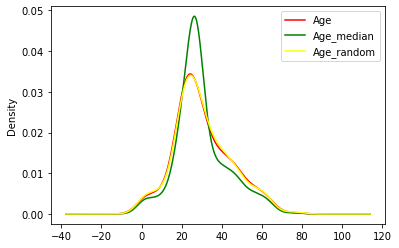

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="red")
df["Age_median"].plot(kind="kde",ax=ax,color="green")
df["Age_random"].plot(kind="kde",ax=ax,color="yellow")
lines, lables=ax.get_legend_handles_labels()
ax.legend(lines, lables,loc="best")
plt.show()

**Advantages**
- Easy To implement
- There is less distortion in variance

**Disadvantages**
- Every situation randomness wont work

## Capturing NAN value with new feature
- It works well if the data are not missing completely at random

In [36]:
import numpy as np

## if there is missing value, we put 1 otherwise 0.

In [37]:
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)

In [38]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Age_NAN
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.5,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.0,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,62.0,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,27.0,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,22.0,0
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,14.0,14.0,0
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,30.0,30.0,0
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,26.0,26.0,0
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,18.0,18.0,0
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,21.0,21.0,0


**Advantages**
- Easy to implement
- Captures the importance of missing values

**Disadvantages**
- Creating Additional Features(Curse of Dimensionality)

# End of Distribution imputation
- Missing values are replaced with values that are at the extreme end of the distribution

In [47]:
def impute_NAN(df,variable,median,extreme_value):
    df[variable + "_extreme"] = df["Age"].fillna(extreme_value)
    
# extreme is generally value lies above 3 standard deviation
extreme = df["Age"].mean() + (3*(df["Age"].std())) 
    
impute_NAN(df,"Age",df["Age"].median(),extreme)

In [48]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Age_NAN,Age_extreme
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.5,0,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.0,0,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,62.0,0,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,27.0,0,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,22.0,0,22.0
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,14.0,14.0,0,14.0
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,30.0,30.0,0,30.0
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,26.0,26.0,0,26.0
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,18.0,18.0,0,18.0
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,21.0,21.0,0,21.0


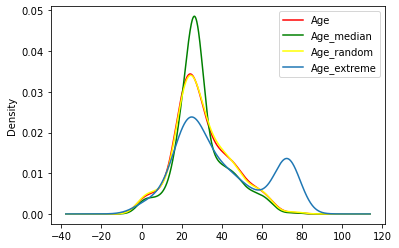

In [49]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="red")
df["Age_median"].plot(kind="kde",ax=ax,color="green")
df["Age_random"].plot(kind="kde",ax=ax,color="yellow")
df["Age_extreme"].plot(kind="kde",ax=ax)
lines, lables=ax.get_legend_handles_labels()
ax.legend(lines, lables,loc="best")
plt.show()

**Advantages**
- Easy to implement
- Preserves sample size
- Can be useful for variables with a skewed distribution

**Disadvantages**
- Can introduce bias
- Ignores relationships between variables
- Results in loss of information

## Imputed columns Vs Original

<AxesSubplot:>

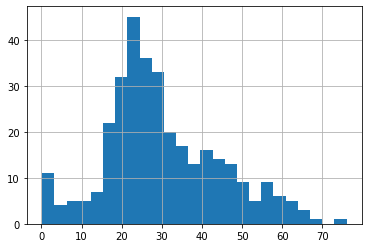

In [51]:
df["Age"].hist(bins=25)

<AxesSubplot:>

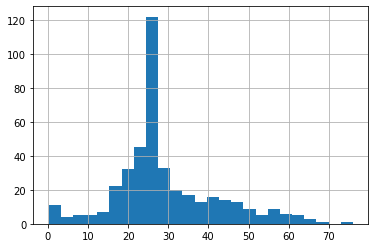

In [52]:
df["Age_median"].hist(bins=25)

<AxesSubplot:>

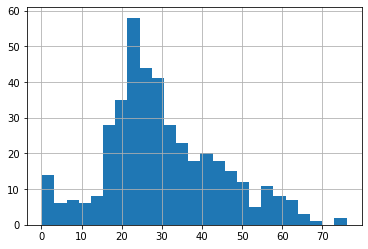

In [53]:
df["Age_random"].hist(bins=25)

<AxesSubplot:>

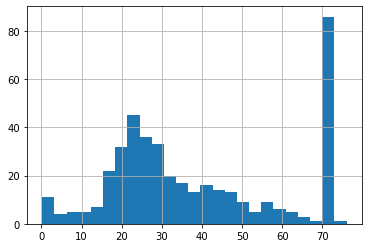

In [54]:
df["Age_extreme"].hist(bins=25)

<AxesSubplot:xlabel='Age_extreme'>

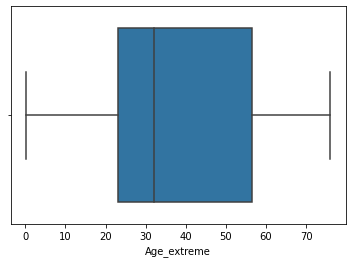

In [55]:
sns.boxplot(x="Age_extreme",data=df)

## End of Distribution imputation removes outliers

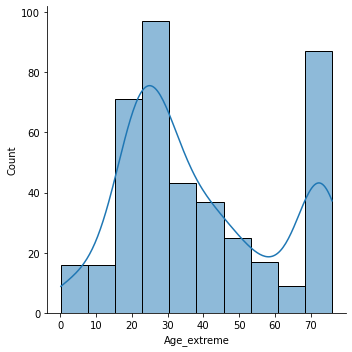

In [56]:
sns.displot(df["Age_extreme"],kde=True)

<AxesSubplot:xlabel='Age'>

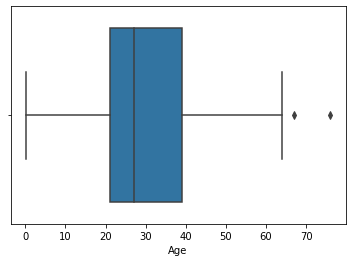

In [57]:
sns.boxplot(x=df["Age"])

## Arbitrary value imputation

- It consists of replacing NAN by an arbitrary value

In [58]:
def impute_nan(df,variable):
    df[variable +'_zero'] = df[variable].fillna(0)
    df[variable +'_hundred'] = df[variable].fillna(100)

<AxesSubplot:>

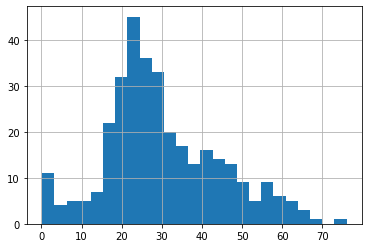

In [59]:
df['Age'].hist(bins=25)

**Advantages**
- Easy to implement
- Captures the importance of missingess if there is one

**Disadvantages**
- Distorts the original distribution of the variable
- If missingess is not important it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to us.

# Handling categorical values
- frequent category imputation

In [61]:
df1 = pd.read_csv("tips.csv",usecols=["sex","smoker","day","total_bill"])

In [63]:
df1.head()

,total_bill,sex,smoker,day
0,16.99,Female,No,Sun
1,10.34,Male,No,Sun
2,21.01,Male,No,Sun
3,23.68,Male,No,Sun
4,24.59,Female,No,Sun


In [64]:
df1.isnull().mean().sort_values(ascending=True)

total_bill    0.0
sex           0.0
smoker        0.0
day           0.0
dtype: float64

<AxesSubplot:xlabel='sex'>

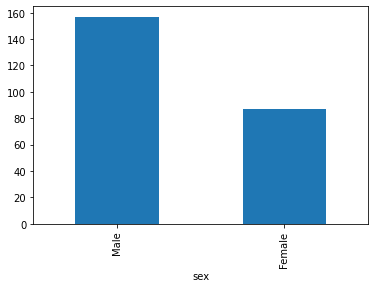

In [65]:
 df1.groupby("sex")["sex"].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

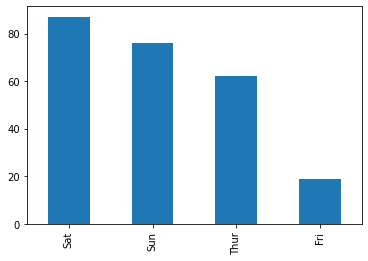

In [66]:
df1["day"].value_counts().plot.bar()

<AxesSubplot:>

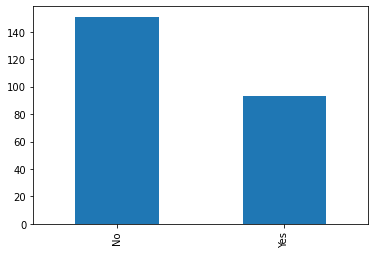

In [67]:
df1["smoker"].value_counts().plot.bar()

In [71]:
def impute_nan_cat(df1,variable):
    most_frequent_category = df1[variable].mode()[0]
    df1[variable].fillna(most_frequent_category,inplace=True)

In [72]:
for feature in ["sex","smoker","day"]:
    impute_nan_cat(df1,feature)

In [73]:
df1.isnull().sum()

total_bill    0
sex           0
smoker        0
day           0
dtype: int64

In [74]:
df1.head()

,total_bill,sex,smoker,day
0,16.99,Female,No,Sun
1,10.34,Male,No,Sun
2,21.01,Male,No,Sun
3,23.68,Male,No,Sun
4,24.59,Female,No,Sun


**Advantages**
- Easy To implement
- Fater way to implement

**Disadvantages**
- Since we are using the more frequent labels, it may use them in an over respresented way if there are many NAN It           distorts the relation of the most frequent label.